# 6.1 MNIST

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [3]:
X=tf.placeholder(tf.float32, [None,784])
Y=tf.placeholder(tf.float32, [None,10])

W1=tf.Variable(tf.random_normal([784,256], stddev=.01))
L1=tf.nn.relu(tf.matmul(X,W1))

W2=tf.Variable(tf.random_normal([256,256], stddev=.01))
L2=tf.nn.relu(tf.matmul(L1,W2))

W3=tf.Variable(tf.random_normal([256,10], stddev=.01))
model=tf.matmul(L2,W3)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))
optimizer=tf.train.AdamOptimizer(.01).minimize(cost)

In [10]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/ batch_size)

for epoch in range(15):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs, batch_ys=mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        total_cost +=cost_val
        
    print('Epoch:%04d' %(epoch+1), 'Avg. cost ={:.3f}'.format(total_cost/total_batch))

Epoch:0001 Avg. cost =0.261
Epoch:0002 Avg. cost =0.147
Epoch:0003 Avg. cost =0.126
Epoch:0004 Avg. cost =0.111
Epoch:0005 Avg. cost =0.096
Epoch:0006 Avg. cost =0.091
Epoch:0007 Avg. cost =0.091
Epoch:0008 Avg. cost =0.080
Epoch:0009 Avg. cost =0.086
Epoch:0010 Avg. cost =0.067
Epoch:0011 Avg. cost =0.071
Epoch:0012 Avg. cost =0.068
Epoch:0013 Avg. cost =0.075
Epoch:0014 Avg. cost =0.060
Epoch:0015 Avg. cost =0.082


In [11]:
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(model,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Accuracy: 0.9673


# 6.2 DropOut

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
X=tf.placeholder(tf.float32, [None,784])
Y=tf.placeholder(tf.float32, [None,10])
keep_prob=tf.placeholder(tf.float32)

W1=tf.Variable(tf.random_normal([784,256], stddev=.01))
L1=tf.nn.relu(tf.matmul(X,W1))
L1=tf.nn.dropout(L1, keep_prob)

W2=tf.Variable(tf.random_normal([256,256], stddev=.01))
L2=tf.nn.relu(tf.matmul(L1,W2))
L2=tf.nn.dropout(L2, keep_prob)

W3=tf.Variable(tf.random_normal([256,10], stddev=.01))
model=tf.matmul(L2,W3)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))
optimizer=tf.train.AdamOptimizer(.01).minimize(cost)

In [9]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/ batch_size)

for epoch in range(30):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs, batch_ys=mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.8})
        total_cost +=cost_val
        
    print('Epoch:%04d' %(epoch+1), 'Avg. cost ={:.3f}'.format(total_cost/total_batch))

Epoch:0001 Avg. cost =0.328
Epoch:0002 Avg. cost =0.242
Epoch:0003 Avg. cost =0.230
Epoch:0004 Avg. cost =0.208
Epoch:0005 Avg. cost =0.203
Epoch:0006 Avg. cost =0.193
Epoch:0007 Avg. cost =0.201
Epoch:0008 Avg. cost =0.188
Epoch:0009 Avg. cost =0.176
Epoch:0010 Avg. cost =0.185
Epoch:0011 Avg. cost =0.181
Epoch:0012 Avg. cost =0.182
Epoch:0013 Avg. cost =0.174
Epoch:0014 Avg. cost =0.165
Epoch:0015 Avg. cost =0.161
Epoch:0016 Avg. cost =0.173
Epoch:0017 Avg. cost =0.157
Epoch:0018 Avg. cost =0.171
Epoch:0019 Avg. cost =0.152
Epoch:0020 Avg. cost =0.155
Epoch:0021 Avg. cost =0.153
Epoch:0022 Avg. cost =0.155
Epoch:0023 Avg. cost =0.154
Epoch:0024 Avg. cost =0.149
Epoch:0025 Avg. cost =0.155
Epoch:0026 Avg. cost =0.160
Epoch:0027 Avg. cost =0.152
Epoch:0028 Avg. cost =0.147
Epoch:0029 Avg. cost =0.137
Epoch:0030 Avg. cost =0.131


In [10]:
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(model,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

Accuracy: 0.9712


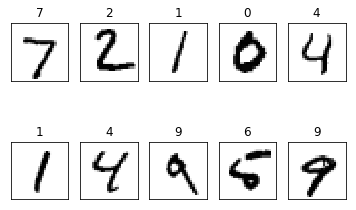

In [11]:
labels=sess.run(model, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})

fig=plt.figure()
for i in range(10):
    subplot=fig.add_subplot(2,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' %np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()